<a href="https://colab.research.google.com/github/marypthomas/ai-bootcamp-osu/blob/main/Session_9/AIBootCamp_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Bootcamp Hands-on: Linear Regression**
**Author**:
- Prof. Eric Fosler-Lussier, The Ohio State University


# **Goals**

The goals of this notebook are to familarize you with:

*   Gradient descent
*   Multivariate regression
*   Data exploration

## **Initial setup**

**0.0:** If none of your team members are familar with python this will be difficult to accomplish - you may want to split up and join different groups.

**0.1:** While not completely necessary for this assignment, you may want to familiarize yourself with the following packages: [numpy](https://numpy.org), [scikit-learn](https://scikit-learn.org), [pandas](https://pandas.pydata.org), [matplotlib](https://matplotlib.org).

---
---

## **Univariate Linear Regression & Gradient Descent**

In the first part of today's discussion, we discussed how minimizing the Mean Squared Error criterion can lead to one solution of "best fit" for linear regression.  We looked at a dataset that related housing price and square footage in Columbus.  Your first task will be to replicate the regression algorithm that was demonstrated in class. Some of the more straightforward tasks will be given to you in code; some will need to be filled in.

**1.0:** Set up the environment (you can click on the play button below to import the appropriate modules).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**1.1** Read the data from GitHub into a pandas dataframe.

In [ ]:
ColumbusHousingUrl='https://github.com/efosler/cse5522data/raw/master/columbus_price_vs_sf.csv'
colhouse_dataframe=pd.read_csv(ColumbusHousingUrl)

**1.2** Print out the top of the dataframe to make sure that the data loaded correctly.  It should be a data table with two columns (price, sf), and 5 rows, with the first row 220000,2240.

In [ ]:
colhouse_dataframe.head()

,price,sf
0,220000,2240
1,171900,1720
2,201500,2786
3,140000,1040
4,159000,2038


**1.3:** At this point you may want to select columns from the dataframe; this is optional but may make debugging a bit easier as dataframes are not really arrays but are iterables.  Personally I like to use numpy arrays but you can choose to use standard python arrays if you wish.

In [ ]:
sf=np.array(colhouse_dataframe['sf'],dtype='float').reshape(-1,1)
price=np.array(colhouse_dataframe['price'],dtype='float').reshape(-1,1)
sf.shape

(222, 1)

**1.4:** Now the real work begins. Write a function that, given the dataset (sf,price) and a current set of weights, returns the gradient of the mean squared error.  You may wish to refer to the class notes on the MSE gradient.

In [ ]:
# computeMSEBatchGradient: 
#   weights - vector of weights (univariate linear = 2 weights)
#   features - vector (or matrix) of feature values
#   targets - vector of target values, same length as features
#
#   returns average gradient over the batch of features
def computeMSEBatchGradient(weights,features,targets):
  
  # insert calculation of gradient here
  
  return gradient

Here is my solution.

**1.5:** Next, write the function that calculates a weight update based on the gradient and learning rate.  Solution provided below.

In [ ]:
# computeGradientDescentWeightUpdate:
#   weights - vector initial weights
#   features - vector/matrix of features
#   targets - vector of target values
#   learning_rate - step length for update
def computeGradientDescentWeightUpdate(weights, features, targets, learning_rate):

  # insert calculation of weight update here
  # This computes using matrix multiplication rather than loops
  predictions=features*weights[0]+weights[1]
  errors=targets-predictions
  gradient=np.array([-2.0*np.average(features*errors),-2.0*np.average(errors)])
  
  return gradient

  return weights


In [ ]:
def computeGradientDescentWeightUpdate(weights, features, targets, learning_rate):

  gradient=computeMSEBatchGradient(weights,features,targets)
  weights = weights - learning_rate * gradient

  return weights

**1.6:** Now write the outer wrapper that initializes the weights and learning rate and runs the gradient update in a loop.  You can choose to run for a fixed number of iterations, or test for convergence by seeing if the weights change more than some small amount.  Print out the weights at the end.   *Note: if your code runs for more than a minute then you probably have a diverging set of weights.*


In [ ]:
# insert wrapper code 
# pick some weights sort of in the right ballpark
weights=[150.,20000.]
learning_rate=0.0001
def run(weights,sf,price,learning_rate):
  for step in range(10000):
    weights=computeGradientDescentWeightUpdate(weights,sf,price,learning_rate)
    if (step%1000 == 0):
      print(weights)
  print(weights)

run(weights,sf,price,learning_rate)

**1.7:** Compare your results against a known linear regression algorithm from *scikit-learn*.  Do you get the same values for slope and intercept?




In [ ]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model.fit(sf,price)


LinearRegression()

In [ ]:
# print slope 
lin_model.coef_

array([[110.08078024]])

In [ ]:
# print intercept
lin_model.intercept_

array([-39486.50513007])

**1.8:** At this point, go back to 1.6 and try tuning the learning rate.  Can you notice any differences in the algorithm's performance?  If your algorithm didn't converge previously, you may want to adjust the scale of your data (maybe make them fall in roughly the same range), or have multiple learning rates.  


---


*Hint: you may want to print the weights every 1000 updates or so to see how the weights change over time.  If you want to get really tricky you can try to reimplment the movie we showed in class, but probably beyond the scope of this exercise.*

---

One trick that ML practitioners often do is to *normalize* the data by subtracting the mean and dividing by the standard deviation; this means that you can usually use a learning rate in roughly the same ballpark each time.   


##  **Multivariate regression**

In this part of the hands-on class, you'll explore multivariate regression.  We'll use the *scikit-learn* linear regression tool (although you're welcome to extend your code above if you wish).  The primary reason for this is that the sklearn routines will handle some of the normalization issues for you.

Some parts of this tutorial were based on [Argawal, Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155).

**2.0:** We'll be looking at the Boston Housing dataset which is built in to sklearn, but has more variables. Load the dataset in:

In [ ]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

**2.1** You can see a description of the dataset by printing the dataset's DESCR attribute (set by the sklearn.dataset package).

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**2.2:** We can convert this data into a pandas dataframe and then look at the first few rows in tabular form.

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**2.3:** At this point, we want to figure out what variables are good predictors of the median value of a house in Boston.  We can find the relationship between single variables by looking at the correlation between variables.  

---

*Side note: the correlation between two vectors of variables x and y is* 
```
1/(n-1) sum x*y
```
*assuming that x and y have zero mean and a standard gaussian distribution (which you can achieve by subtracting the mean and dividing by the standard deviation).  If x and y always share the same sign, then this value will be positive; if x and y are always opposite sign then the correlation is negative.*

---

The sklearn.datasets class has a built in correlation function, which we can use to compute the correlation between each pair of variables.  We can also use the seaborn package to plot a nice heatmap of these variables.

**What's the most correlated variable with MEDV?**


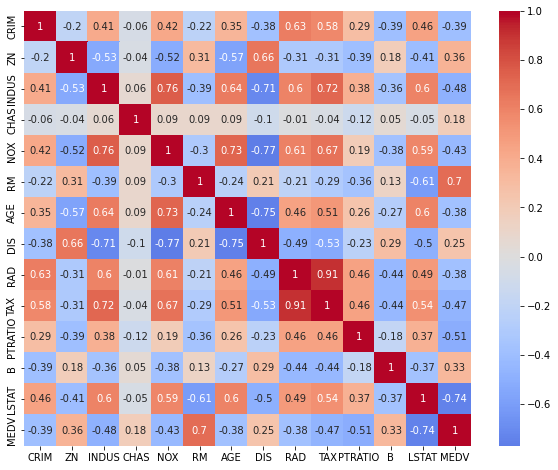

In [ ]:
import seaborn as sb

correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(10,8))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

Note that the most correlated variable is LSTAT (at -0.74) and not RM (0.70) - while the correlation is negative, it just means that there is an inverse relationship between LSTAT and MEDV, but LSTAT should be the single best predictor.

**2.4:** Now, we kind of cheated there, since we figured out the correlation on the entire dataset.  A better practice is to randomly select training and test sets, fit the data on the training set, and then evaluate on the test set.  Let's see if LSTAT really is a better predictor than RM of MEDV.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# first, set up dataframe for all variables 
boston_totaldata = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_totaltarget = boston_dataset.target

boston_traindata, boston_testdata, boston_traintarget, boston_testtarget = train_test_split(boston_totaldata,
                                                                                           boston_totaltarget,
                                                                                           test_size=0.2,
                                                                                           random_state=5)

In [ ]:
boston_traindata.shape

(404, 13)

In [ ]:
boston_testdata.shape

(102, 13)

In [ ]:
# subselect LSTAT data, train model
#   note the double square brackets - need 2-dimensional array to come out of selection
lstat_traindata=boston_traindata[['LSTAT']]
lstat_testdata=boston_testdata[['LSTAT']]
lin_model = LinearRegression()
lin_model.fit(lstat_traindata,boston_traintarget)

LinearRegression()

In [ ]:
lstat_testpredict=lin_model.predict(lstat_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget,lstat_testpredict)))
r2 = r2_score(boston_testtarget,lstat_testpredict)
print('Test RMSE = {}, Test R2 = {}'.format(rmse,r2))

Test RMSE = 6.2307165730986815, Test R2 = 0.5041523728903132


**2.4a:** R2 is the amount of variation explained by the model, and can range from 0 (no variance explained) to 1 (perfect explanation). Notice that R2 is much lower than the correlation coefficient.  Why? (There are 2 reasons.)

Let's do it again for RM (this time, you calculate it).

In [ ]:
# fill in code to calculate RMSE, R2 for RM variable


(Note: answers for why R2 is lower that correlation is that (a) it's roughly the square of correlation, and also (b) we calculated correlation on the entire training set; R2 was calculated on test only.)

**2.5:** At this point, you can start to look at how to predict from multiple variables.  What are the two best variables in predicting as measured by R2?

Are the results better than predicting using all variables?

In [ ]:
# Rebuild your training set to look at two variable prediction.

## **Predicting Gene Expression [on your own]**

There are ~20,000 genes in the human genome. Each one of them is transcribed to mRNA and then translated to proteins which carry on various tasks inside our body. We can measure the amount of 20,000 mRNA expressed in samples collected from different organs. This collection is called _gene expression profile_. 

Although our genome is the same across all cell types, the gene expression profile is different because each organ needs different proteins for its survival. One of the regulatory mechanisms which controls the expression level in each cell type is microRNA (miR). MicroRNAs are small molecules which attach to mRNAs and prevent them from translation to proteins and also degrade them.

So if miR A targets mRNA B when A increases B decreases. Our goal is to predict mRNA levels (gene expression profile) using 21 miR features. Note that each of the 20,000 expression levels can be a response of regression with 21 features. To simplify, we have selected a few genes to predict their expression. 

This part of the exercise is deliberately more open-ended.

**Instructions:** Load the data from GitHub (example code given).  Use the Boston Housing example to *randomly* break the data into an 80/20 split across the 8895 examples.  Pick a few random examples from the well expressed set and from the poorly expressed set and train a linear regression predictor for each mRNA.  Describe the differences you see across the two sets. 

In [ ]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL)
# remove row names from the frist column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,1:-1]

mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_well = np.transpose(np.array(mRNA_well_df)[:,1:8896])

mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.transpose(np.array(mRNA_poor_df)[:,1:8896])

In [ ]:
# Carry on from this point on your own, using the Boston Housing problem as a guide.
